## Obtaining Data

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

# Initialize Plotly in offline mode
init_notebook_mode(connected=True)

In [4]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv('Employee_Performance.csv')

# Scrubbing the Data

In [7]:
# Check to see if there are any missing values in our data set
df.isnull().any()

EmpNumber                       False
Age                             False
Gender                          False
EducationBackground             False
MaritalStatus                   False
EmpDepartment                   False
EmpJobRole                      False
BusinessTravelFrequency         False
DistanceFromHome                False
EmpEducationLevel               False
EmpEnvironmentSatisfaction      False
EmpHourlyRate                   False
EmpJobInvolvement               False
EmpJobLevel                     False
EmpJobSatisfaction              False
NumCompaniesWorked              False
OverTime                        False
EmpLastSalaryHikePercent        False
EmpRelationshipSatisfaction     False
TotalWorkExperienceInYears      False
TrainingTimesLastYear           False
EmpWorkLifeBalance              False
ExperienceYearsAtThisCompany    False
ExperienceYearsInCurrentRole    False
YearsSinceLastPromotion         False
YearsWithCurrManager            False
Attrition   

In [9]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [11]:
# Create a new column 'AgeGroup' in the DataFrame
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Exploring the Data

In [13]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,AgeGroup
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,10,2,2,10,7,0,8,No,3,25-35
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,20,2,3,7,7,1,7,No,3,45-55
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,20,2,3,18,13,1,12,No,4,35-45
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,23,2,2,21,6,12,6,No,3,35-45
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,10,1,3,2,2,2,2,No,3,55+


In [15]:
df.shape

(1200, 29)

In [17]:
# Display the statistical overview of the employees
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   EmpNumber                     1200 non-null   object  
 1   Age                           1200 non-null   int64   
 2   Gender                        1200 non-null   object  
 3   EducationBackground           1200 non-null   object  
 4   MaritalStatus                 1200 non-null   object  
 5   EmpDepartment                 1200 non-null   object  
 6   EmpJobRole                    1200 non-null   object  
 7   BusinessTravelFrequency       1200 non-null   object  
 8   DistanceFromHome              1200 non-null   int64   
 9   EmpEducationLevel             1200 non-null   int64   
 10  EmpEnvironmentSatisfaction    1200 non-null   int64   
 11  EmpHourlyRate                 1200 non-null   int64   
 12  EmpJobInvolvement             1200 non-null   in

In [21]:
pd.isnull(df).sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
AgeGroup                        0
dtype: int64

In [23]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating', 'AgeGroup'],
      dtype='object')

In [25]:
df['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [27]:
df.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,AgeGroup
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,10,2,2,10,7,0,8,No,3,25-35
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,20,2,3,7,7,1,7,No,3,45-55
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,20,2,3,18,13,1,12,No,4,35-45
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,23,2,2,21,6,12,6,No,3,35-45
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,10,1,3,2,2,2,2,No,3,55+


# visualization of Data

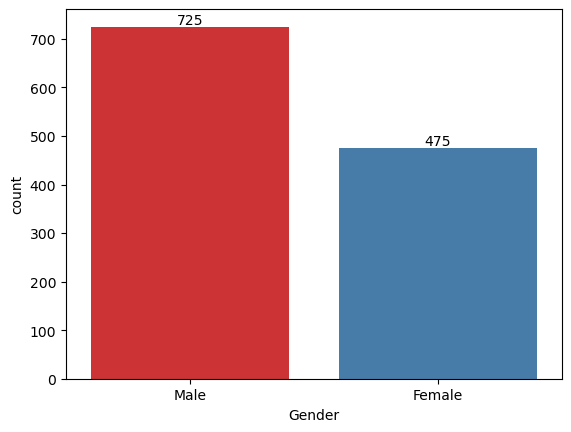

In [31]:
#Gender Distribution Among Employees
colors = ['#1f77b4', '#f0b27a']
ax = sns.countplot(x='Gender' , data =df,palette='Set1')
for bars in ax.containers:
  ax.bar_label(bars)

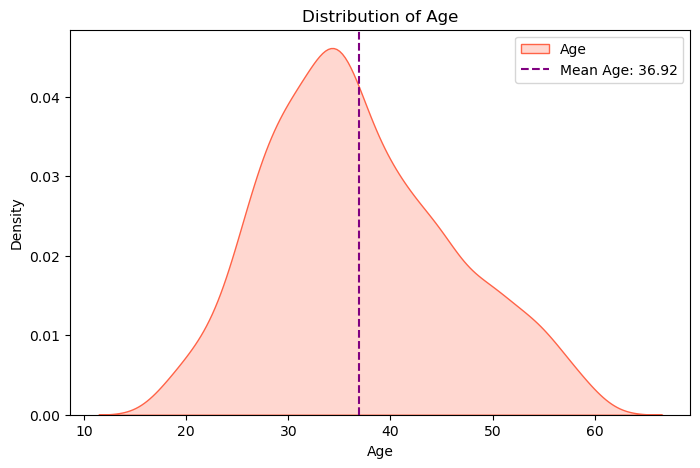

In [33]:
#Distribution of Age
mean_age = df['Age'].mean()
mean_age_formatted = f'{mean_age:.2f}'
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['Age'], color='Tomato', shade=True, label='Age')
plt.axvline(x=mean_age,color ='Purple', linestyle='--', label=f'Mean Age: {mean_age_formatted}')
plt.legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

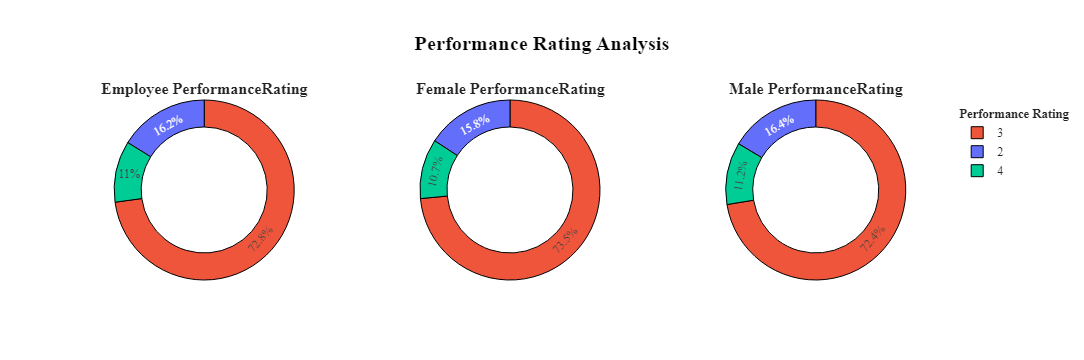

In [35]:
#Percentage Overview of Attrition
att1 = df.groupby('PerformanceRating', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

att2 = df.groupby(['Gender', 'PerformanceRating'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('<b>Employee PerformanceRating</b>', '<b>Female PerformanceRating</b>', '<b>Male PerformanceRating</b>'))

fig.add_trace(go.Pie(values=att1['Count'], labels=att1['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Employee PerformanceRating', showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Female']['Count'], labels=att2[att2['Gender'] == 'Female']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Female PerformanceRating', showlegend=False), row=1, col=2)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Male']['Count'], labels=att2[att2['Gender'] == 'Male']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Male PerformanceRating', showlegend=True), row=1, col=3)

fig.update_layout(title_x=0.5, template='simple_white', showlegend=True,
                  legend_title_text="<b style=\"font-size:90%;\">Performance Rating</b>",
                  title_text='<b style="color:black; font-size:120%;">Performance Rating Analysis</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")

fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

fig.show()

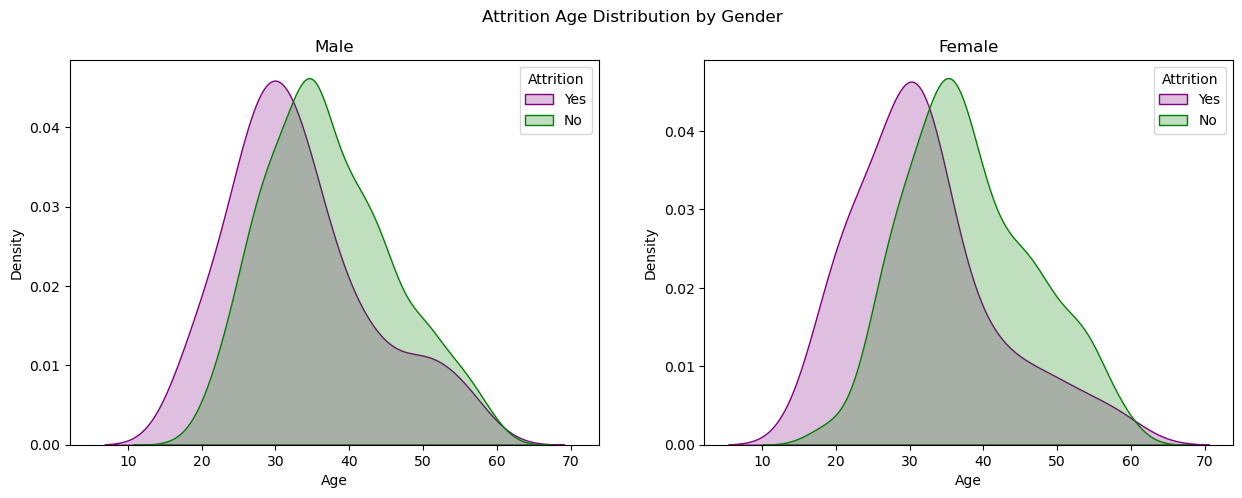

In [37]:
#Attrition Male And Female
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Age Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['Age'], color='purple', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['Age'], color='green', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['Age'], color='purple', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['Age'], color='green', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

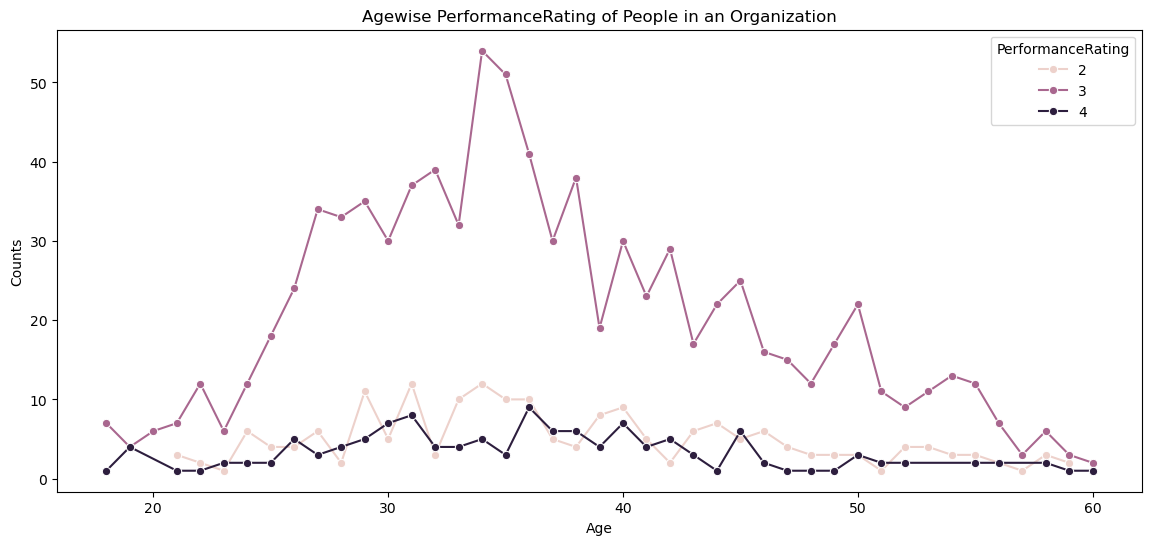

In [17]:

# Assuming df is your DataFrame and it's already defined
age_att = df.groupby(['Age', 'PerformanceRating']).size().reset_index(name='Counts')

# Create the line plot using seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=age_att, x='Age', y='Counts', hue='PerformanceRating', marker='o')

plt.title('Agewise PerformanceRating of People in an Organization')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend(title='PerformanceRating')
plt.show()

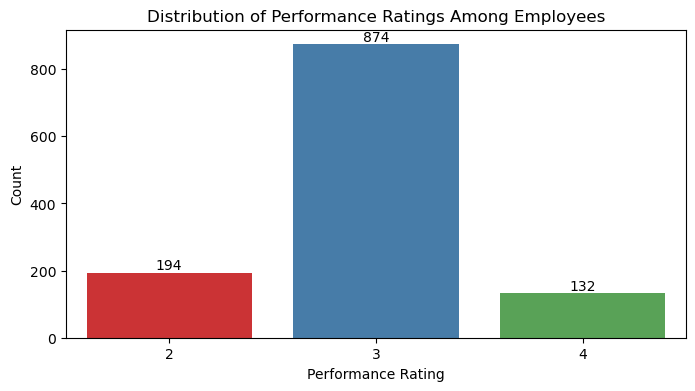

In [41]:
# Employee performance ratings Distribution
plt.figure(figsize=(8,4))
ax = sns.countplot(x='PerformanceRating', data=df,palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Distribution of Performance Ratings Among Employees')
plt.xlabel('Performance Rating')
plt.ylabel('Count')

plt.show()

In [43]:
#Creating a new DataSet of Low Employee Performance
low_performance_threshold = 2

low_performance_df=df[df['PerformanceRating'] <= low_performance_threshold]

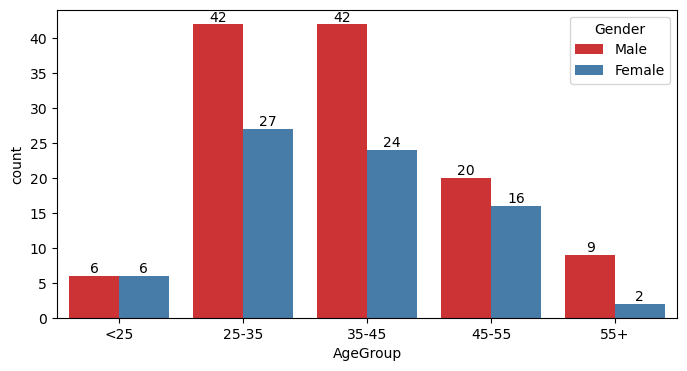

In [45]:
#Performnace Affecting Age Group
plt.figure(figsize=(8, 4))
ax =sns.countplot(data =low_performance_df, x ='AgeGroup', hue ='Gender',palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

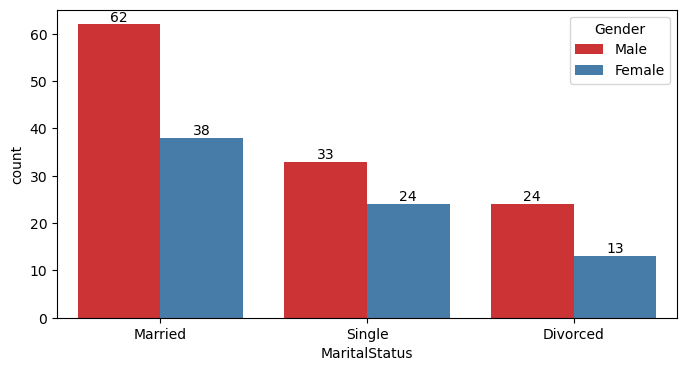

In [47]:
#MartitalStatus Of Low Performnace Employees
plt.figure(figsize=(8,4))
ax =sns.countplot(data =low_performance_df, x ='MaritalStatus', hue ='Gender',palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

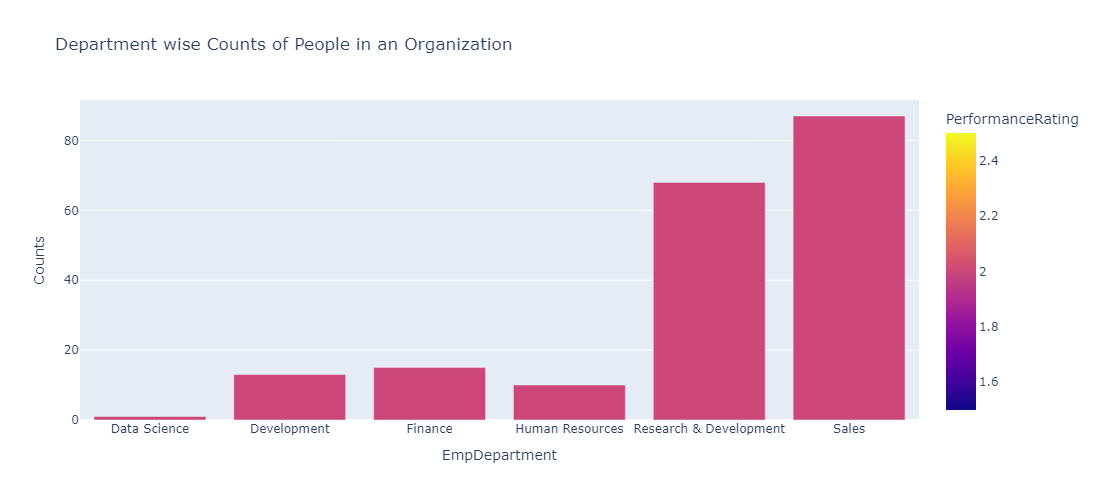

In [49]:
#Addresing Low Perfrpmance Department
dept_att=low_performance_df.groupby(['EmpDepartment','PerformanceRating']).size().reset_index(name='Counts')
fig=px.bar(dept_att,x='EmpDepartment',y='Counts', color='PerformanceRating',title='Department wise Counts of People in an Organization',width=1000,
             height=500 )
fig.show()

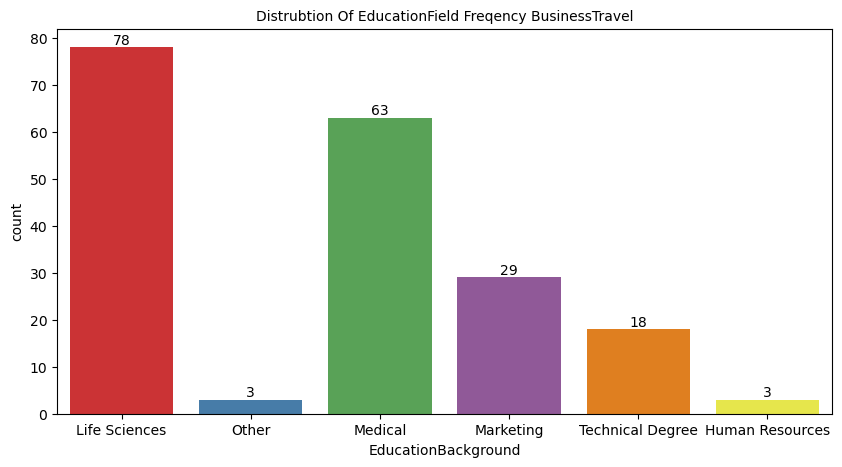

In [51]:
#EductaionField of Employees
plt.figure(figsize=(10,5))
ax =sns.countplot(x='EducationBackground',data=low_performance_df,palette='Set1')
plt.title('Distrubtion Of EducationField Freqency BusinessTravel',fontsize=10)

for bars in ax.containers:
  ax.bar_label(bars)

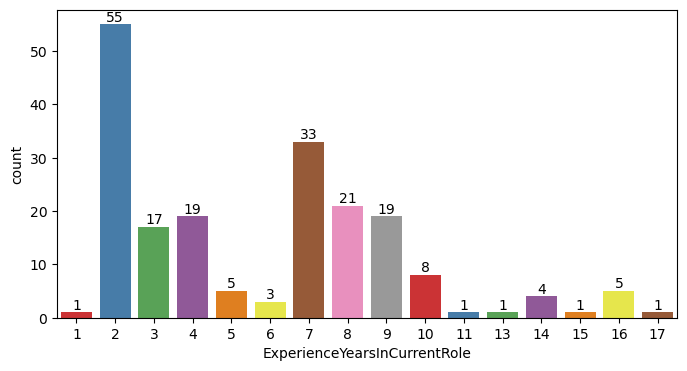

In [53]:
#Experinece of YearsInCurrentRole
plt.figure(figsize=(8,4))
ax =sns.countplot(data =low_performance_df, x ='ExperienceYearsInCurrentRole',palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

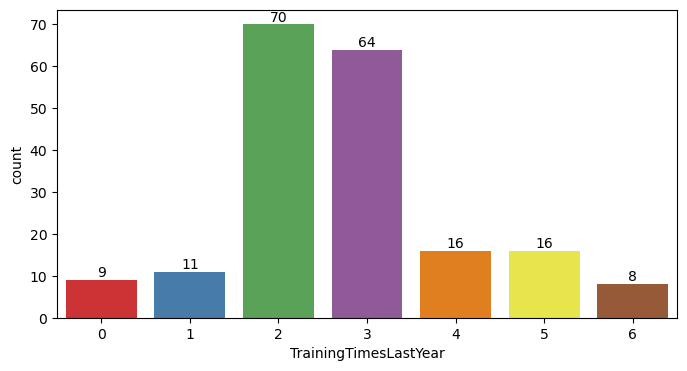

In [55]:
#Distribution of EmployeesTrainning
plt.figure(figsize=(8,4))
ax =sns.countplot(data =low_performance_df, x ='TrainingTimesLastYear',palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

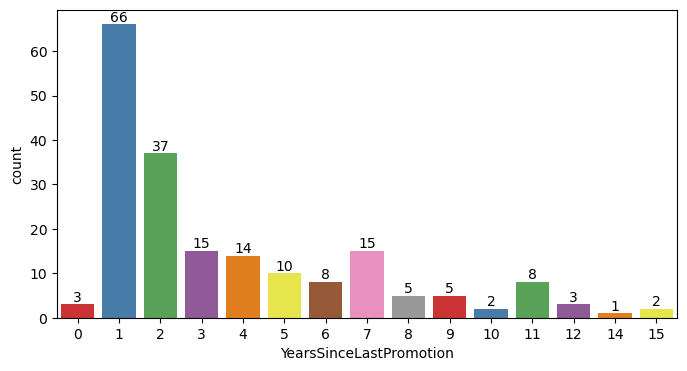

In [57]:
#Promation of Employees
plt.figure(figsize=(8,4))
ax =sns.countplot(data =low_performance_df, x ='YearsSinceLastPromotion',palette='Set1')

for bars in ax.containers:
  ax.bar_label(bars)

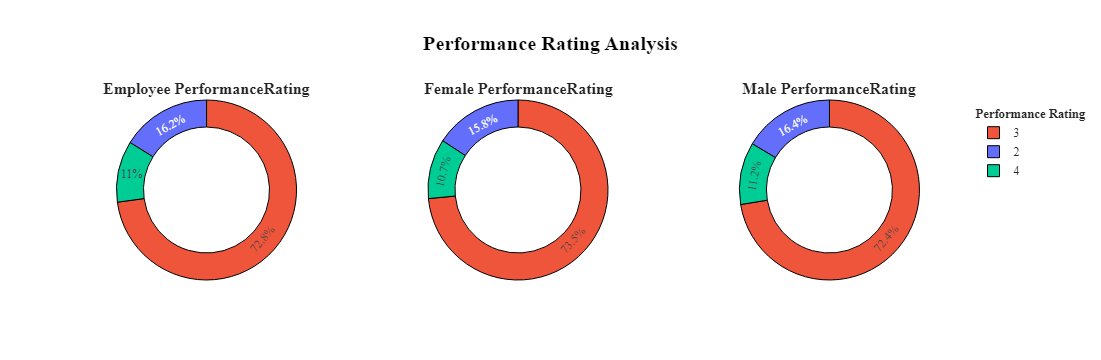

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Grouping and preparing data
att1 = df.groupby('PerformanceRating', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

att2 = df.groupby(['Gender', 'PerformanceRating'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create the subplots
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('<b>Employee PerformanceRating</b>', '<b>Female PerformanceRating</b>', '<b>Male PerformanceRating</b>'))

# Add the pie charts
fig.add_trace(go.Pie(values=att1['Count'], labels=att1['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Employee PerformanceRating', showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Female']['Count'], labels=att2[att2['Gender'] == 'Female']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Female PerformanceRating', showlegend=False), row=1, col=2)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Male']['Count'], labels=att2[att2['Gender'] == 'Male']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Male PerformanceRating', showlegend=True), row=1, col=3)

# Update layout
fig.update_layout(title_x=0.5, template='simple_white', showlegend=True,
                  legend_title_text="<b style=\"font-size:90%;\">Performance Rating</b>",
                  title_text='<b style="color:black; font-size:120%;">Performance Rating Analysis</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")

fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Render the plot in the notebook
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Grouping and preparing data
att1 = df.groupby('PerformanceRating', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

att2 = df.groupby(['Gender', 'PerformanceRating'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create the subplots
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('<b>Employee PerformanceRating</b>', '<b>Female PerformanceRating</b>', '<b>Male PerformanceRating</b>'))

# Add the pie charts
fig.add_trace(go.Pie(values=att1['Count'], labels=att1['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Employee PerformanceRating', showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Female']['Count'], labels=att2[att2['Gender'] == 'Female']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Female PerformanceRating', showlegend=False), row=1, col=2)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Male']['Count'], labels=att2[att2['Gender'] == 'Male']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Male PerformanceRating', showlegend=True), row=1, col=3)

# Update layout
fig.update_layout(title_x=0.5, template='simple_white', showlegend=True,
                  legend_title_text="<b style=\"font-size:90%;\">Performance Rating</b>",
                  title_text='<b style="color:black; font-size:120%;">Performance Rating Analysis</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")

fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Save the plot as an HTML file
fig.write_html("performance_rating_analysis.html")

# If you are in a Jupyter notebook, you can display it like this:
from IPython.display import IFrame
IFrame("performance_rating_analysis.html", width=900, height=400)

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Grouping and preparing data
att1 = df.groupby('PerformanceRating', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

att2 = df.groupby(['Gender', 'PerformanceRating'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create the subplots
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('<b>Employee PerformanceRating</b>', '<b>Female PerformanceRating</b>', '<b>Male PerformanceRating</b>'))

# Add the pie charts
fig.add_trace(go.Pie(values=att1['Count'], labels=att1['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Employee PerformanceRating', showlegend=False), row=1, col=1)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Female']['Count'], labels=att2[att2['Gender'] == 'Female']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Female PerformanceRating', showlegend=False), row=1, col=2)

fig.add_trace(go.Pie(values=att2[att2['Gender'] == 'Male']['Count'], labels=att2[att2['Gender'] == 'Male']['PerformanceRating'], hole=0.7,
                     marker_colors=colors, name='Male PerformanceRating', showlegend=True), row=1, col=3)

# Update layout
fig.update_layout(title_x=0.5, template='simple_white', showlegend=True,
                  legend_title_text="<b style=\"font-size:90%;\">Performance Rating</b>",
                  title_text='<b style="color:black; font-size:120%;">Performance Rating Analysis</b>',
                  font_family="Times New Roman", title_font_family="Times New Roman")

fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Save the plot as a static image
fig.write_image("performance_rating_analysis.png")

# Display the image if you're in a notebook
from IPython.display import Image
Image("performance_rating_analysis.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
